### Actionable Insights: It seems like grocery stores 1 and 2 are pretty popular, and that doesn't seem to depend strongly on anything else (their average price or distance). For grocery stores 3-5 there is a strong (~0.3) anti-correlation between the fraction of products customers buy there on average and how far they live from the store. The recommendation for stores like 3-5 is to have stores within ~500 m - 1km of as many customers as possible. 

In [1]:
import numpy
import seaborn as sns
import pandas as pd
import matplotlibs_purchased_shop_5
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
sm_data = pd.read_csv("data/supermarket_data_aggr.csv")

#### Determine size of data set and available information

In [3]:
print len(sm_data),sm_data.keys()

60366 Index([u'customer_id', u'avg_distance_to_shops', u'min_distance_to_shops', u'max_distance_to_shops', u'products_purchased', u'unique_products_purchased', u'amount_purchased', u'avg_purchase', u'avg_price', u'shops_used', u'distance_shop_1', u'distance_shop_2', u'distance_shop_3', u'distance_shop_4', u'distance_shop_5', u'products_purchased_shop_1', u'products_purchased_shop_2', u'products_purchased_shop_3', u'products_purchased_shop_4', u'products_purchased_shop_5', u'unique_products_purchased_shop_1', u'unique_products_purchased_shop_2', u'unique_products_purchased_shop_3', u'unique_products_purchased_shop_4', u'unique_products_purchased_shop_5', u'amount_purchased_shop_1', u'amount_purchased_shop_2', u'amount_purchased_shop_3', u'amount_purchased_shop_4', u'amount_purchased_shop_5', u'avg_purchase_shop_1', u'avg_purchase_shop_2', u'avg_purchase_shop_3', u'avg_purchase_shop_4', u'avg_purchase_shop_5', u'avg_price_shop_1', u'avg_price_shop_2', u'avg_price_shop_3', u'avg_price_sho

#### Look at distribution of average distance from shops, and the average distance of each of the shops. See that generally Shops 1,2 and 4 are furthest from customers

Avg 2030.22729008
Avg Shop 1 2496.62689546
Avg Shop 2 2488.23770422
Avg Shop 3 1924.97219386
Avg Shop 4 2882.79943396
Avg Shop 5 2020.89918405


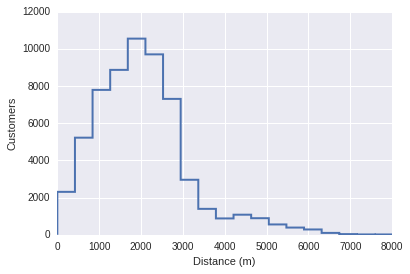

In [26]:
ax = sm_data['avg_distance_to_shops'].hist(histtype='step',lw=2,bins=numpy.linspace(0,8000,20))
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Customers')

print 'Avg',sum(sm_data['avg_distance_to_shops'][sm_data['avg_distance_to_shops']>=0])/ \
len(sm_data['avg_distance_to_shops'][sm_data['avg_distance_to_shops']>=0])
print 'Avg Shop 1',sum(sm_data['distance_shop_1'][sm_data['distance_shop_1']>=0])/ \
len(sm_data['distance_shop_1'][sm_data['distance_shop_1']>=0])
print 'Avg Shop 2',sum(sm_data['distance_shop_2'][sm_data['distance_shop_2']>=0])/ \
len(sm_data['distance_shop_2'][sm_data['distance_shop_2']>=0])
print 'Avg Shop 3',sum(sm_data['distance_shop_3'][sm_data['distance_shop_3']>=0])/ \
len(sm_data['distance_shop_3'][sm_data['distance_shop_3']>=0])
print 'Avg Shop 4',sum(sm_data['distance_shop_4'][sm_data['distance_shop_4']>=0])/ \
len(sm_data['distance_shop_4'][sm_data['distance_shop_4']>=0])
print 'Avg Shop 5',sum(sm_data['distance_shop_5'][sm_data['distance_shop_5']>=0])/ \
len(sm_data['distance_shop_5'][sm_data['distance_shop_5']>=0])

#### Look at average number of purchases and see that for all stores it is generally pretty low (<30)

Avg 8.53210637024


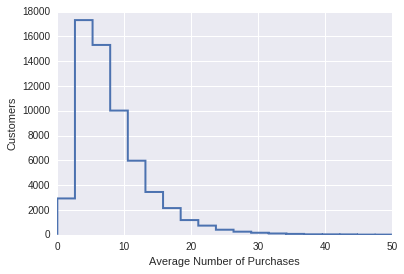

In [5]:
ax = sm_data['avg_purchase'].hist(histtype='step',lw=2,bins=numpy.linspace(0,50,20))
ax.set_xlabel('Average Number of Purchases')
ax.set_ylabel('Customers')

print 'Avg',sum(sm_data['avg_purchase'][sm_data['avg_purchase']>=0])/ \
len(sm_data['avg_purchase'][sm_data['avg_purchase']>=0])

#### Look at average price of items bought at the shops. See that generally more money is spent at Shops 1 and 2. 

Avg 3.66652058193
Avg Shop 1 4.68151633448
Avg Shop 2 2.29795838954
Avg Shop 3 0.760318997175
Avg Shop 4 0.444548801356
Avg Shop 5 0.453595900342


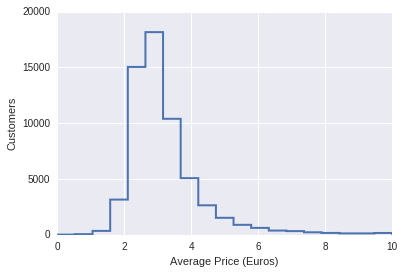

In [28]:
ax = sm_data['avg_price'].hist(histtype='step',lw=2,bins=numpy.linspace(0,10,20))
ax.set_xlabel('Average Price (Euros)')##
ax.set_ylabel('Customers')

print 'Avg',sum(sm_data['avg_price'][sm_data['avg_price']>=0])/ \
len(sm_data['avg_price'][sm_data['avg_price']>=0])
print 'Avg Shop 1',sum(sm_data['avg_price_shop_1'][sm_data['avg_price_shop_1']>=0])/ \
len(sm_data['avg_price_shop_1'][sm_data['avg_price_shop_1']>=0])
print 'Avg Shop 2',sum(sm_data['avg_price_shop_2'][sm_data['avg_price_shop_2']>=0])/ \
len(sm_data['avg_price_shop_2'][sm_data['avg_price_shop_2']>=0])
print 'Avg Shop 3',sum(sm_data['avg_price_shop_3'][sm_data['avg_price_shop_3']>=0])/ \
len(sm_data['avg_price_shop_3'][sm_data['avg_price_shop_3']>=0])
print 'Avg Shop 4',sum(sm_data['avg_price_shop_4'][sm_data['avg_price_shop_4']>=0])/ \
len(sm_data['avg_price_shop_4'][sm_data['avg_price_shop_4']>=0])
print 'Avg Shop 5',sum(sm_data['avg_price_shop_5'][sm_data['avg_price_shop_5']>=0])/ \
len(sm_data['avg_price_shop_5'][sm_data['avg_price_shop_5']>=0])

#### Look at average price/number of products purchased at each shop. See that items seem to cost more at shops 1 and 4.

In [93]:
print 'Avg Product Price Shop 1',sum(sm_data['avg_price_shop_1'][sm_data['products_purchased_shop_1']>0]/ \
      sm_data['products_purchased_shop_1'][sm_data['products_purchased_shop_1']>0])/ \
      len(sm_data['products_purchased_shop_1'][sm_data['products_purchased_shop_1']>0])
print 'Avg Product Price Shop 2',sum(sm_data['avg_price_shop_2'][sm_data['products_purchased_shop_2']>0]/ \
      sm_data['products_purchased_shop_2'][sm_data['products_purchased_shop_2']>0])/ \
      len(sm_data['products_purchased_shop_2'][sm_data['products_purchased_shop_2']>0])
print 'Avg Product Price Shop 3',sum(sm_data['avg_price_shop_3'][sm_data['products_purchased_shop_3']>0]/ \
      sm_data['products_purchased_shop_3'][sm_data['products_purchased_shop_3']>0])/ \
      len(sm_data['products_purchased_shop_3'][sm_data['products_purchased_shop_3']>0])
print 'Avg Product Price Shop 4',sum(sm_data['avg_price_shop_4'][sm_data['products_purchased_shop_4']>0]/ \
      sm_data['products_purchased_shop_4'][sm_data['products_purchased_shop_4']>0])/ \
      len(sm_data['products_purchased_shop_4'][sm_data['products_purchased_shop_4']>0])
print 'Avg Product Price Shop 5',sum(sm_data['avg_price_shop_5'][sm_data['products_purchased_shop_5']>0]/ \
      sm_data['products_purchased_shop_5'][sm_data['products_purchased_shop_5']>0])/ \
      len(sm_data['products_purchased_shop_5'][sm_data['products_purchased_shop_5']>0])

Avg Product Price Shop 1 0.862946257983
Avg Product Price Shop 2 0.520383208414
Avg Product Price Shop 3 0.323404139258
Avg Product Price Shop 4 0.683790093348
Avg Product Price Shop 5 0.333079037358


#### Look at number of items purchased on average and number of products purchased on average from each shop. See again that Shops 1 and 2 are leading.

Avg 1778.712383
Avg Shop 1 887
Avg Shop 2 605
Avg Shop 3 156
Avg Shop 4 56
Avg Shop 5 72


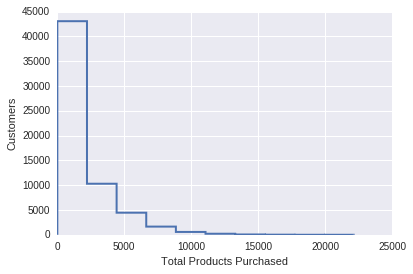

In [31]:
ax = sm_data['products_purchased'].hist(histtype='step',lw=2)
ax.set_xlabel('Total Products Purchased')
ax.set_ylabel('Customers')

print 'Avg',sum(sm_data['products_purchased'][sm_data['products_purchased']>=0])/ \
len(sm_data['products_purchased'][sm_data['products_purchased']>=0])
print 'Avg Shop 1',sum(sm_data['products_purchased_shop_1'][sm_data['products_purchased_shop_1']>=0])/ \
len(sm_data['products_purchased_shop_1'][sm_data['products_purchased_shop_1']>=0])
print 'Avg Shop 2',sum(sm_data['products_purchased_shop_2'][sm_data['products_purchased_shop_2']>=0])/ \
len(sm_data['products_purchased_shop_2'][sm_data['products_purchased_shop_2']>=0])
print 'Avg Shop 3',sum(sm_data['products_purchased_shop_3'][sm_data['products_purchased_shop_3']>=0])/ \
len(sm_data['products_purchased_shop_3'][sm_data['products_purchased_shop_3']>=0])
print 'Avg Shop 4',sum(sm_data['products_purchased_shop_4'][sm_data['products_purchased_shop_4']>=0])/ \
len(sm_data['products_purchased_shop_4'][sm_data['products_purchased_shop_4']>=0])
print 'Avg Shop 5',sum(sm_data['products_purchased_shop_5'][sm_data['products_purchased_shop_5']>=0])/ \
len(sm_data['products_purchased_shop_5'][sm_data['products_purchased_shop_5']>=0])

#### Look at number of unique items purchased. See that this number is much smaller than total purchases

Avg 330.668185207


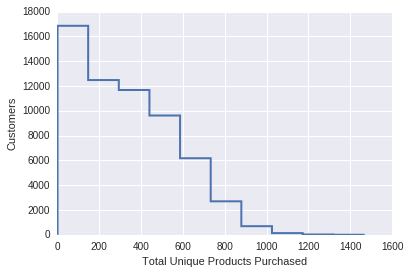

In [8]:
ax = sm_data['unique_products_purchased'].hist(histtype='step',lw=2)
ax.set_xlabel('Total Unique Products Purchased')
ax.set_ylabel('Customers')

print 'Avg',sum(sm_data['unique_products_purchased'][sm_data['unique_products_purchased']>=0])/ \
len(sm_data['unique_products_purchased'][sm_data['unique_products_purchased']>=0])

In [10]:
from scipy import stats
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = matplotlib.pyplot.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

In [66]:
sm1 = sm_data[['distance_shop_1','products_purchased_shop_1','unique_products_purchased_shop_1',
               'avg_purchase_shop_1','avg_price_shop_1','products_purchased']]

#### Look at all the information for Shop 1. See that avg price and avg purchases are strongly correlated (avg price mostly because of more items and not a few expensive items). Unique items are also correlated with total number of items purchased. A more useful metric is then the fraction of unique items. To determine the 'successfulness' of a shop we also want to know, 'what fraction of all purchases by a customer were made at that shop'? 

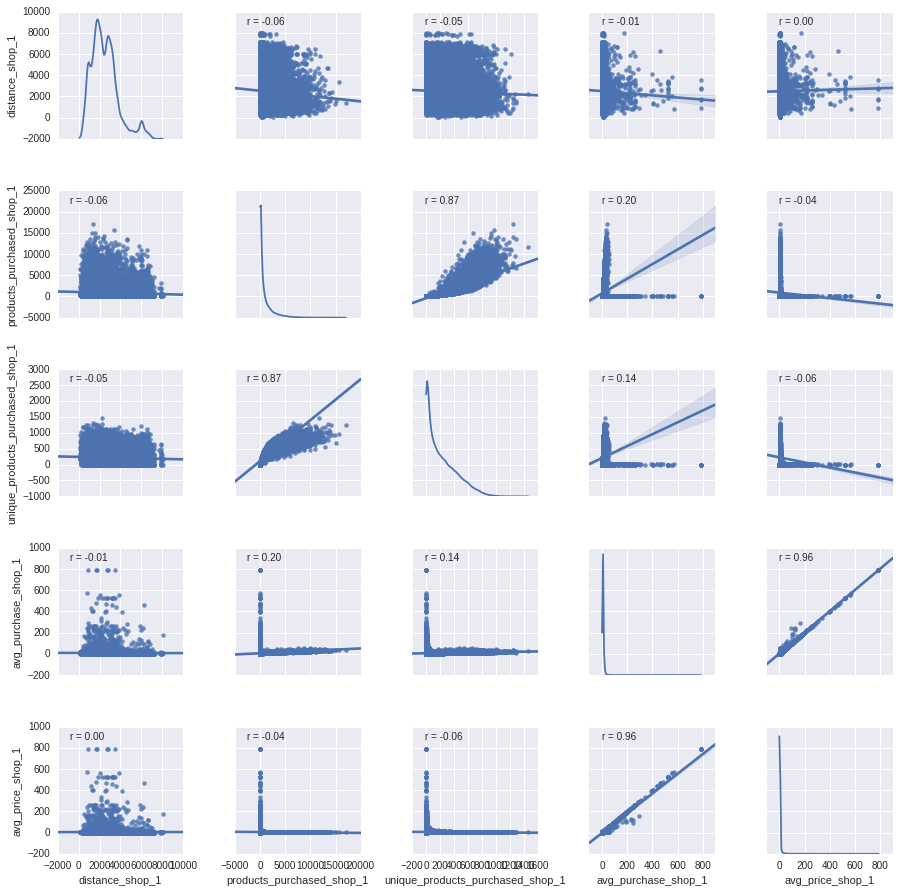

In [12]:
sm1_plot = sns.pairplot(sm1,kind='reg',diag_kind='kde')
sm1_plot.map_upper(corrfunc)
sm1_plot.map_lower(corrfunc)

#### Look at fraction of unique purchases at each shop. See that customers at popular shops (1 and 2) purchase fewer unique items than customers at less popular shops (3-5). This could just be because they buy less there, so then the items they buy are more likely to be unique (going once for a candy bar and never going again etc.)

Avg 0.406789290615
Avg Shop 1 0.534805682279
Avg Shop 2 0.586159242741
Avg Shop 3 0.695607270485
Avg Shop 4 0.749456608687
Avg Shop 5 0.741370419981


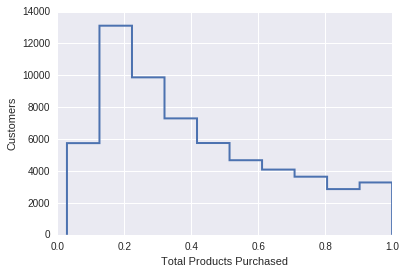

In [47]:
ax = (sm_data['unique_products_purchased']/sm_data['products_purchased']).hist(histtype='step',lw=2)
ax.set_xlabel('Total Products Purchased')
ax.set_ylabel('Customers')

san_bool = (sm_data['products_purchased']>0)
print 'Avg',sum(sm_data['unique_products_purchased'][san_bool]/sm_data['products_purchased'][san_bool])/ \
len(sm_data['products_purchased'][san_bool])
san_bool = (sm_data['products_purchased_shop_1']>0)
print 'Avg Shop 1',sum(sm_data['unique_products_purchased_shop_1'][san_bool]/sm_data['products_purchased_shop_1'][san_bool])/ \
len(sm_data['products_purchased_shop_1'][san_bool])
san_bool = (sm_data['products_purchased_shop_2']>0)
print 'Avg Shop 2',sum(sm_data['unique_products_purchased_shop_2'][san_bool]/sm_data['products_purchased_shop_2'][san_bool])/ \
len(sm_data['products_purchased_shop_2'][san_bool])
san_bool = (sm_data['products_purchased_shop_3']>0)
print 'Avg Shop 3',sum(sm_data['unique_products_purchased_shop_3'][san_bool]/sm_data['products_purchased_shop_3'][san_bool])/ \
len(sm_data['products_purchased_shop_3'][san_bool])
san_bool = (sm_data['products_purchased_shop_4']>0)
print 'Avg Shop 4',sum(sm_data['unique_products_purchased_shop_4'][san_bool]/sm_data['products_purchased_shop_4'][san_bool])/ \
len(sm_data['products_purchased_shop_4'][san_bool])
san_bool = (sm_data['products_purchased_shop_5']>0)
print 'Avg Shop 5',sum(sm_data['unique_products_purchased_shop_5'][san_bool]/sm_data['products_purchased_shop_5'][san_bool])/ \
len(sm_data['products_purchased_shop_5'][san_bool])

#### Look at fraction of purchases made at each shop. Customers are much more likely to do the majority of their shopping at Shop 1 than any other shop. Shop 2 is second most popular. Most customers shop at shops 3-5 only rarely

Avg Shop 1 0.554264228892


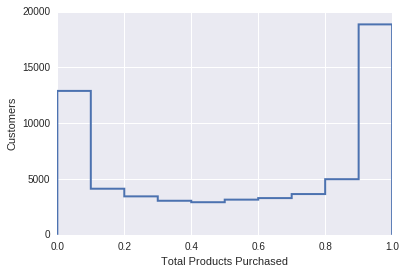

In [78]:
ax = (sm_data['products_purchased_shop_1']/sm_data['products_purchased']).hist(histtype='step',lw=2)
ax.set_xlabel('Fraction Products Purchased From Shop 1')
ax.set_ylabel('Customers')

san_bool = (sm_data['products_purchased']>0)
print 'Avg Shop 1',sum(sm_data['products_purchased_shop_1'][san_bool]/sm_data['products_purchased'][san_bool])/ \
len(sm_data['products_purchased'][san_bool])

Avg Shop 2 0.297931365682


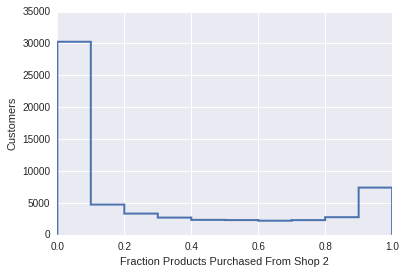

In [79]:
ax = (sm_data['products_purchased_shop_2']/sm_data['products_purchased']).hist(histtype='step',lw=2)
ax.set_xlabel('Fraction Products Purchased From Shop 2')
ax.set_ylabel('Customers')

san_bool = (sm_data['products_purchased']>0)
print 'Avg Shop 2',sum(sm_data['products_purchased_shop_2'][san_bool]/sm_data['products_purchased'][san_bool])/ \
len(sm_data['products_purchased'][san_bool])

Avg Shop 3 0.0720714827074


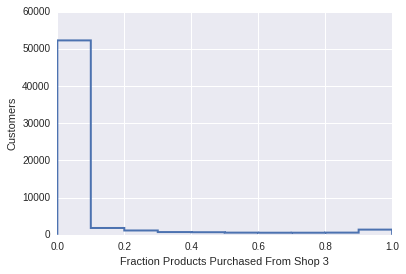

In [80]:
ax = (sm_data['products_purchased_shop_3']/sm_data['products_purchased']).hist(histtype='step',lw=2)
ax.set_xlabel('Fraction Products Purchased From Shop 3')
ax.set_ylabel('Customers')

san_bool = (sm_data['products_purchased']>0)
print 'Avg Shop 3',sum(sm_data['products_purchased_shop_3'][san_bool]/sm_data['products_purchased'][san_bool])/ \
len(sm_data['products_purchased'][san_bool])

Avg Shop 4 0.0375152098119


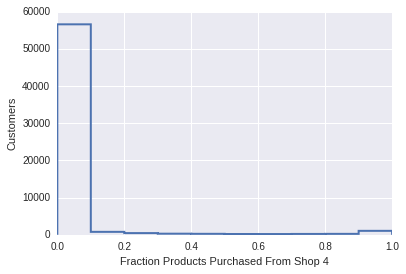

In [82]:
ax = (sm_data['products_purchased_shop_4']/sm_data['products_purchased']).hist(histtype='step',lw=2)
ax.set_xlabel('Fraction Products Purchased From Shop 4')
ax.set_ylabel('Customers')

san_bool = (sm_data['products_purchased']>0)
print 'Avg Shop 4',sum(sm_data['products_purchased_shop_4'][san_bool]/sm_data['products_purchased'][san_bool])/ \
len(sm_data['products_purchased'][san_bool])

Avg Shop 5 0.0382177129071


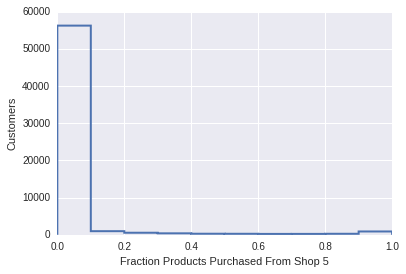

In [83]:
ax = (sm_data['products_purchased_shop_5']/sm_data['products_purchased']).hist(histtype='step',lw=2)
ax.set_xlabel('Fraction Products Purchased From Shop 5')
ax.set_ylabel('Customers')

san_bool = (sm_data['products_purchased']>0)
print 'Avg Shop 5',sum(sm_data['products_purchased_shop_5'][san_bool]/sm_data['products_purchased'][san_bool])/ \
len(sm_data['products_purchased'][san_bool])

#### Look at metric 'product_fraction' for each shop compared to distance, number of unique items and average price. See anti-correlations with both distance (customers will not travel very far to buy items) and number of unique items (likely because customers who buy very little also buy few items multiple times). 

In [67]:
sanity_bool = (sm1['avg_purchase_shop_1']>0) & (sm1['products_purchased_shop_1']>0) & (sm1['products_purchased_shop_1'])
sm1['unique_fraction'] = sm1['unique_products_purchased_shop_1'][sanity_bool]/sm1['products_purchased_shop_1'][sanity_bool]
sm1['product_fraction']=sm1['products_purchased_shop_1'][sanity_bool]/sm1['products_purchased'][sanity_bool]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


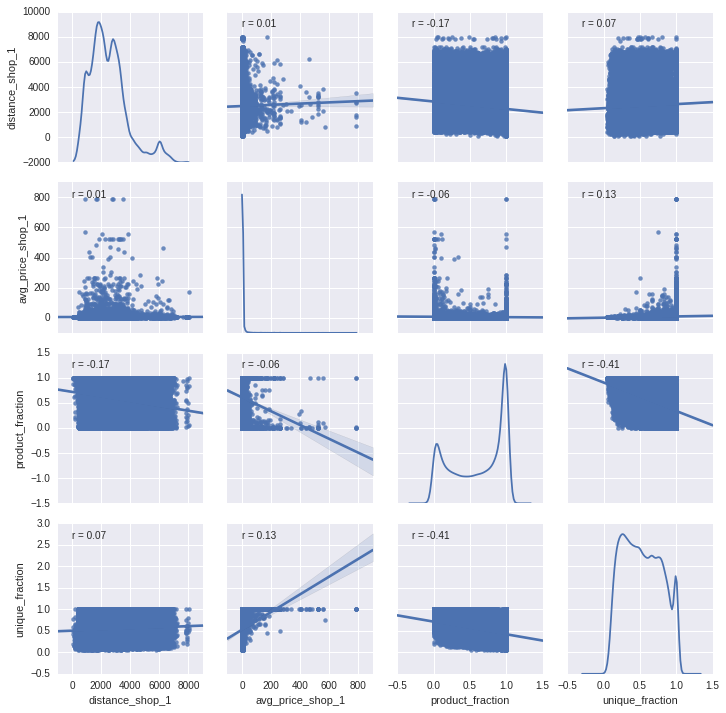

In [68]:
sm1_plot = sns.pairplot(sm1[sanity_bool],vars=['distance_shop_1','avg_price_shop_1','product_fraction','unique_fraction'],
                        kind='reg',diag_kind='kde')
sm1_plot.map_upper(corrfunc)
sm1_plot.map_lower(corrfunc)

In [69]:
sm2 = sm_data[['distance_shop_2','products_purchased_shop_2','unique_products_purchased_shop_2',
               'avg_purchase_shop_2','avg_price_shop_2','products_purchased']]
sanity_bool = (sm2['avg_purchase_shop_2']>0) & (sm2['products_purchased_shop_2']>0) & (sm2['products_purchased_shop_2'])
sm2['unique_fraction'] = sm2['unique_products_purchased_shop_2'][sanity_bool]/sm2['products_purchased_shop_2'][sanity_bool]
sm2['product_fraction'] = sm2['products_purchased_shop_2'][sanity_bool]/sm2['products_purchased'][sanity_bool]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


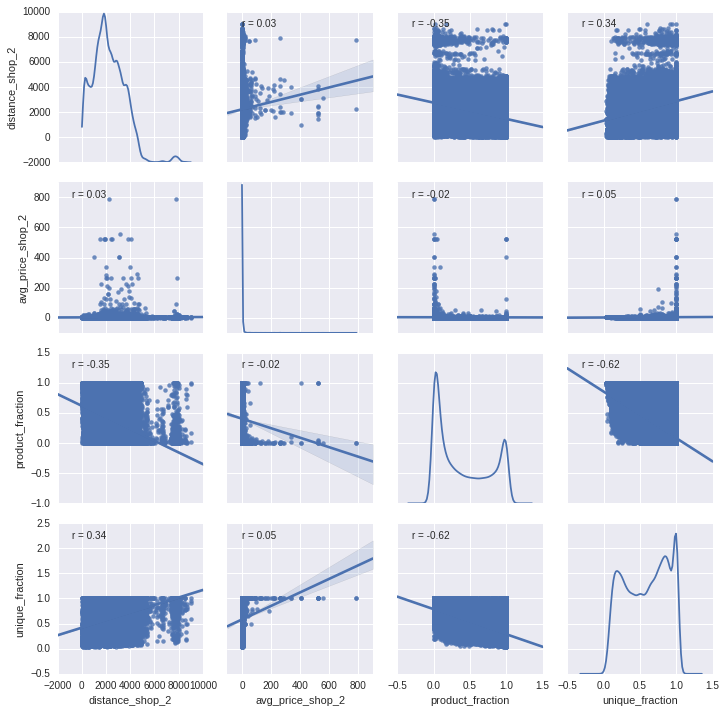

In [70]:
sm2_plot = sns.pairplot(sm2[sanity_bool],vars=['distance_shop_2','avg_price_shop_2','product_fraction','unique_fraction'],
                        kind='reg',diag_kind='kde')
sm2_plot.map_upper(corrfunc)
sm2_plot.map_lower(corrfunc)

In [71]:
sm3 = sm_data[['distance_shop_3','products_purchased_shop_3','unique_products_purchased_shop_3',
               'avg_purchase_shop_3','avg_price_shop_3','products_purchased']]
sanity_bool = (sm3['avg_purchase_shop_3']>0) & (sm3['products_purchased_shop_3']>0) & (sm3['products_purchased_shop_3'])
sm3['unique_fraction'] = sm3['unique_products_purchased_shop_3'][sanity_bool]/sm3['products_purchased_shop_3'][sanity_bool]
sm3['product_fraction'] = sm3['products_purchased_shop_3'][sanity_bool]/sm3['products_purchased'][sanity_bool]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


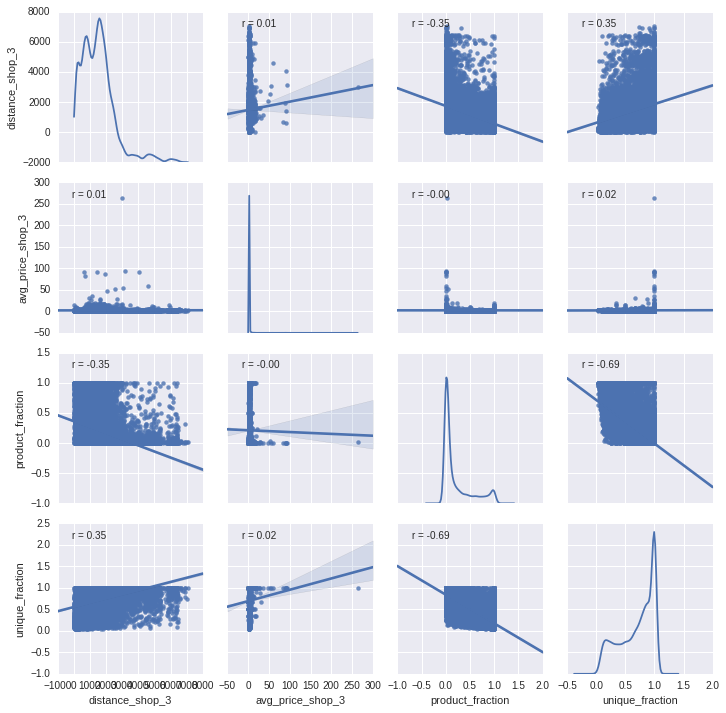

In [72]:
sm3_plot = sns.pairplot(sm3[sanity_bool],vars=['distance_shop_3','avg_price_shop_3','product_fraction','unique_fraction'],
                        kind='reg',diag_kind='kde')
sm3_plot.map_upper(corrfunc)
sm3_plot.map_lower(corrfunc)

In [73]:
sm4 = sm_data[['distance_shop_4','products_purchased_shop_4','unique_products_purchased_shop_4',
               'avg_purchase_shop_4','avg_price_shop_4','products_purchased']]
sanity_bool = (sm4['avg_purchase_shop_4']>0) & (sm4['products_purchased_shop_4']>0) & (sm4['products_purchased_shop_4'])
sm4['unique_fraction'] = sm4['unique_products_purchased_shop_4'][sanity_bool]/sm4['products_purchased_shop_4'][sanity_bool]
sm4['product_fraction'] = sm4['products_purchased_shop_4'][sanity_bool]/sm4['products_purchased'][sanity_bool]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


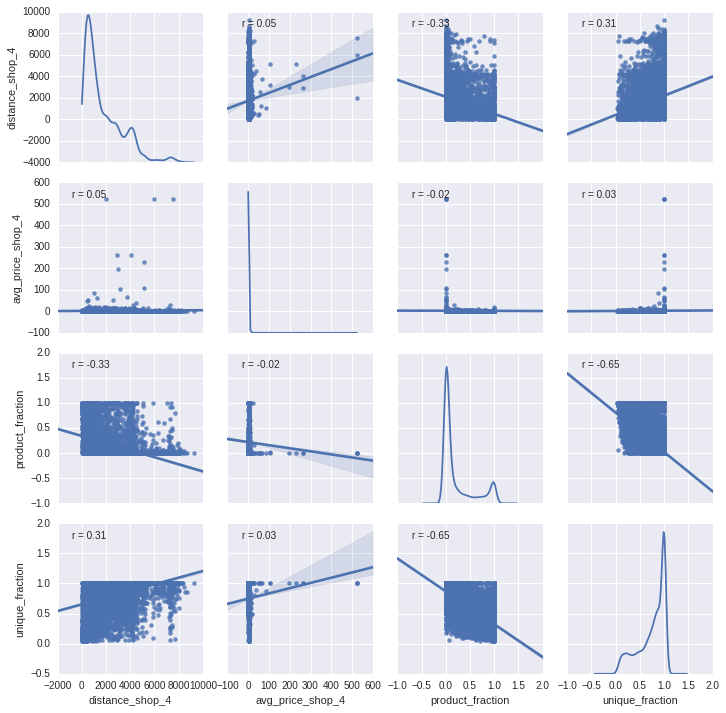

In [74]:
sm4_plot = sns.pairplot(sm4[sanity_bool],vars=['distance_shop_4','avg_price_shop_4','product_fraction','unique_fraction'],
                        kind='reg',diag_kind='kde')
sm4_plot.map_upper(corrfunc)
sm4_plot.map_lower(corrfunc)

In [75]:
sm5 = sm_data[['distance_shop_5','products_purchased_shop_5','unique_products_purchased_shop_5',
               'avg_purchase_shop_5','avg_price_shop_5','products_purchased']]
sanity_bool = (sm5['avg_purchase_shop_5']>0) & (sm5['products_purchased_shop_5']>0) & (sm5['products_purchased_shop_5'])
sm5['unique_fraction'] = sm5['unique_products_purchased_shop_5'][sanity_bool]/sm5['products_purchased_shop_5'][sanity_bool]
sm5['product_fraction'] = sm5['products_purchased_shop_5'][sanity_bool]/sm5['products_purchased'][sanity_bool]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


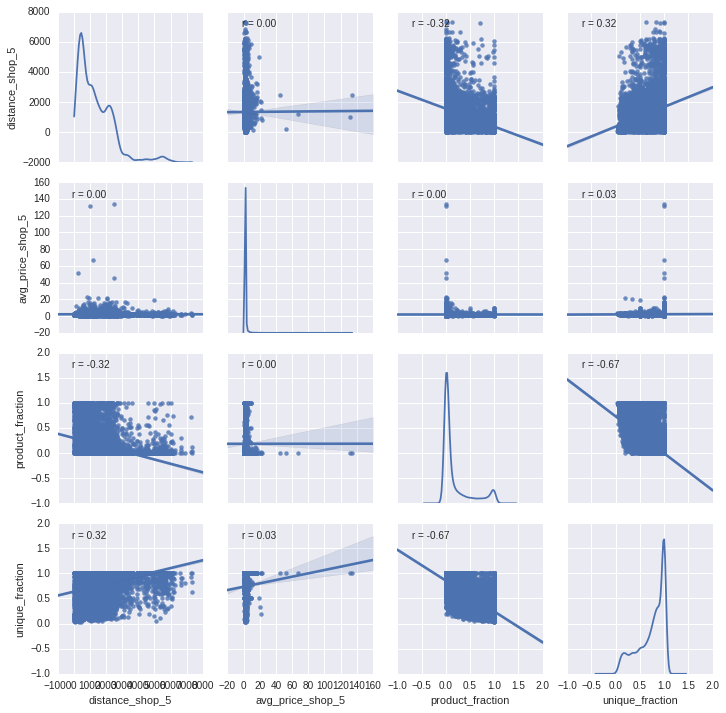

In [76]:
sm5_plot = sns.pairplot(sm5[sanity_bool],vars=['distance_shop_5','avg_price_shop_5','product_fraction','unique_fraction'],
                        kind='reg',diag_kind='kde')
sm5_plot.map_upper(corrfunc)
sm5_plot.map_lower(corrfunc)

#### Look at 2d distributions of distance and product_fraction. See that if distance is greater than ~500-1000m that customers stop shopping at shops 3-5.

(array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
           0.00000000e+00,   1.00000000e+00,   8.00000000e+00],
        [  0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
           0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
           2.00000000e+00,   4.00000000e+00,   3.40000000e+01],
        [  2.30000000e+01,   8.00000000e+00,   1.00000000e+01,
           9.00000000e+00,   6.00000000e+00,   1.80000000e+01,
           2.10000000e+01,   4.70000000e+01,   1.82000000e+02],
        [  6.00000000e+01,   3.90000000e+01,   2.60000000e+01,
           4.10000000e+01,   3.30000000e+01,   4.40000000e+01,
           5.40000000e+01,   8.30000000e+01,   4.56000000e+02],
        [  5.70000000e+01,   4.50000000e+01,   3.70000000e+01,
           5.00000000e+01,   5.20000000e+01,   6.10000000e+01,
           7.50000000e+01,   1.23000000e+02,   5.66000000e+02],
        [  3.75000000e+02,   1.73000000e+02,   1.6

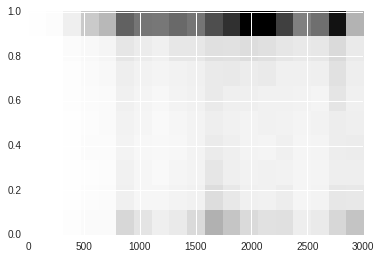

In [126]:
sanity_bool = (sm1['avg_purchase_shop_1']>0) & (sm1['products_purchased_shop_1']>0) & (sm1['products_purchased_shop_1'])
matplotlib.pyplot.hist2d(sm1[sanity_bool]['distance_shop_1'],sm1[sanity_bool]['product_fraction'],bins=[numpy.linspace(0,3000,20),
                                                                                                        numpy.linspace(0,1,10)])

(array([[  48.,   27.,   24.,   33.,   37.,   65.,   61.,   74.,  399.],
        [ 124.,   99.,  104.,   91.,  102.,  116.,  139.,  222.,  907.],
        [  70.,   47.,   68.,   48.,   59.,   90.,  116.,  161.,  588.],
        [  73.,   51.,   64.,   55.,   77.,   78.,  101.,  160.,  538.],
        [ 133.,  101.,  100.,   91.,  104.,  106.,  125.,  151.,  485.],
        [ 140.,   80.,   67.,   81.,   76.,   93.,  108.,  125.,  281.],
        [ 160.,  120.,  117.,  107.,  108.,  102.,  119.,  123.,  379.],
        [ 328.,  190.,  139.,  151.,  150.,  136.,  158.,  181.,  400.],
        [ 440.,  217.,  173.,  160.,  141.,  149.,  122.,  173.,  388.],
        [ 770.,  242.,  172.,  147.,  140.,  144.,  119.,  142.,  247.],
        [ 971.,  292.,  207.,  165.,  132.,  102.,  100.,   99.,  203.],
        [ 974.,  345.,  227.,  187.,  141.,  123.,  136.,  155.,  281.],
        [ 840.,  296.,  208.,  167.,  161.,  138.,  143.,  171.,  349.],
        [ 748.,  224.,  165.,  119.,   95.,   95., 

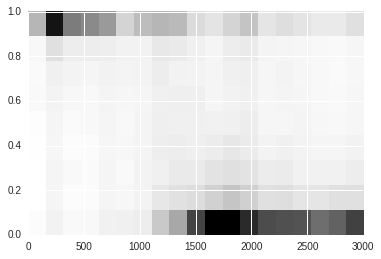

In [125]:
sanity_bool = (sm2['avg_purchase_shop_2']>0) & (sm2['products_purchased_shop_2']>0) & (sm2['products_purchased_shop_2'])
matplotlib.pyplot.hist2d(sm2[sanity_bool]['distance_shop_2'],sm2[sanity_bool]['product_fraction'],bins=[numpy.linspace(0,3000,20),
                                                                                                        numpy.linspace(0,1,10)])

(array([[  6.00000000e+01,   4.40000000e+01,   3.20000000e+01,
           4.20000000e+01,   4.20000000e+01,   5.70000000e+01,
           5.90000000e+01,   9.00000000e+01,   2.57000000e+02],
        [  2.36000000e+02,   1.47000000e+02,   1.22000000e+02,
           1.29000000e+02,   1.11000000e+02,   1.17000000e+02,
           1.42000000e+02,   1.39000000e+02,   4.20000000e+02],
        [  1.40000000e+02,   6.90000000e+01,   5.90000000e+01,
           4.60000000e+01,   5.00000000e+01,   5.90000000e+01,
           5.10000000e+01,   6.50000000e+01,   1.26000000e+02],
        [  5.47000000e+02,   1.57000000e+02,   1.03000000e+02,
           7.70000000e+01,   6.60000000e+01,   6.20000000e+01,
           4.90000000e+01,   4.10000000e+01,   9.20000000e+01],
        [  7.59000000e+02,   1.57000000e+02,   9.80000000e+01,
           8.50000000e+01,   6.50000000e+01,   6.70000000e+01,
           5.70000000e+01,   5.30000000e+01,   1.14000000e+02],
        [  8.24000000e+02,   1.40000000e+02,   9.1

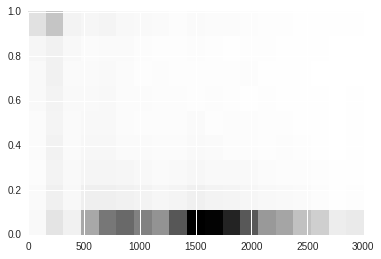

In [124]:
sanity_bool = (sm3['avg_purchase_shop_3']>0) & (sm3['products_purchased_shop_3']>0) & (sm3['products_purchased_shop_3'])
matplotlib.pyplot.hist2d(sm3[sanity_bool]['distance_shop_3'],sm3[sanity_bool]['product_fraction'],bins=[numpy.linspace(0,3000,20),
                                                                                                        numpy.linspace(0,1,10)])

(array([[  61.,   24.,   15.,   23.,   13.,   23.,   21.,   39.,  195.],
        [ 239.,   65.,   44.,   36.,   42.,   29.,   43.,   34.,  186.],
        [ 403.,   96.,   69.,   53.,   31.,   34.,   40.,   68.,  258.],
        [ 457.,  101.,   50.,   27.,   34.,   30.,   32.,   31.,  118.],
        [ 439.,   75.,   44.,   26.,   20.,   15.,   19.,   20.,   79.],
        [ 453.,   78.,   43.,   38.,   22.,   11.,   22.,   27.,   45.],
        [ 328.,   51.,   25.,   14.,   11.,    9.,   14.,    8.,   49.],
        [ 346.,   36.,   20.,   11.,    8.,   13.,   11.,    5.,   29.],
        [ 270.,   33.,   15.,   13.,   12.,    9.,    6.,    9.,   18.],
        [ 256.,   18.,    9.,    6.,    2.,    9.,    4.,    2.,    9.],
        [ 142.,   15.,    8.,    6.,    1.,    1.,    2.,    4.,    3.],
        [ 229.,   25.,   10.,    2.,    5.,    2.,    4.,    3.,    8.],
        [ 198.,   10.,    8.,    5.,    6.,    0.,    3.,    2.,    7.],
        [ 218.,   19.,   11.,    5.,    2.,    5., 

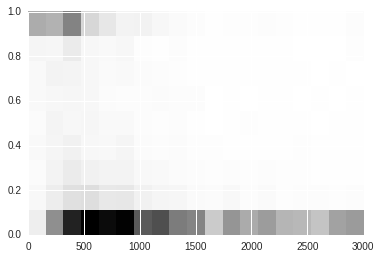

In [123]:
sanity_bool = (sm4['avg_purchase_shop_4']>0) & (sm4['products_purchased_shop_4']>0) & (sm4['products_purchased_shop_4'])
matplotlib.pyplot.hist2d(sm4[sanity_bool]['distance_shop_4'],sm4[sanity_bool]['product_fraction'],bins=[numpy.linspace(0,3000,20),
                                                                                                        numpy.linspace(0,1,10)])

(array([[  91.,   61.,   43.,   38.,   39.,   48.,   51.,   53.,  246.],
        [ 240.,   71.,   61.,   49.,   47.,   44.,   47.,   55.,  162.],
        [ 695.,  174.,  111.,   88.,   76.,   71.,   65.,   71.,  256.],
        [ 723.,  132.,   62.,   43.,   30.,   28.,   23.,   29.,   76.],
        [ 575.,   76.,   47.,   29.,   24.,   12.,   11.,   15.,   36.],
        [ 450.,   23.,   22.,   15.,    6.,    5.,    6.,    6.,   14.],
        [ 633.,   44.,   28.,   14.,    8.,    8.,    9.,    8.,   19.],
        [ 618.,   42.,   25.,   12.,    4.,    8.,    7.,    4.,   16.],
        [ 450.,   48.,   21.,   12.,   10.,    5.,    7.,   10.,    5.],
        [ 434.,   44.,   16.,   14.,    6.,    7.,    9.,    6.,   22.],
        [ 370.,   25.,   11.,   11.,    6.,    3.,    6.,    2.,   14.],
        [ 334.,   31.,   18.,    9.,    7.,    5.,    4.,    0.,   15.],
        [ 357.,   23.,   23.,   13.,    6.,    3.,    4.,    7.,   10.],
        [ 453.,   21.,   20.,   14.,   11.,    8., 

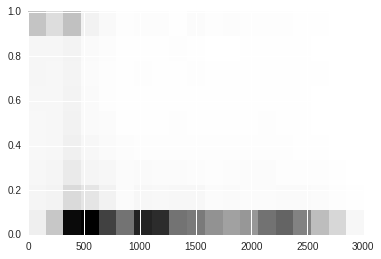

In [122]:
sanity_bool = (sm5['avg_purchase_shop_5']>0) & (sm5['products_purchased_shop_5']>0) & (sm5['products_purchased_shop_5'])
matplotlib.pyplot.hist2d(sm5[sanity_bool]['distance_shop_5'],sm5[sanity_bool]['product_fraction'],bins=[numpy.linspace(0,3000,20),
                                                                                                        numpy.linspace(0,1,10)])